In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
# Get the Data

rainfall = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-07/rainfall.csv')
temperature = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-07/temperature.csv')


In [3]:
# IF YOU USE THIS DATA PLEASE BE CAUTIOUS WITH INTERPRETATION
nasa_fire = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-07/MODIS_C6_Australia_and_New_Zealand_7d.csv')

# For JSON File of fires
url = "http://www.rfs.nsw.gov.au/feeds/majorIncidents.json"


In [159]:
rainfall.tail(20)

,station_code,city_name,year,month,day,rainfall,period,quality,lat,long,station_name
179253,86232,Melbourne,2019,12,18,0.0,NaN,N,-37.83,144.98,Melbourne Botanical Gardens
179254,86232,Melbourne,2019,12,19,0.0,NaN,N,-37.83,144.98,Melbourne Botanical Gardens
179255,86232,Melbourne,2019,12,20,0.0,NaN,N,-37.83,144.98,Melbourne Botanical Gardens
179256,86232,Melbourne,2019,12,21,0.0,NaN,N,-37.83,144.98,Melbourne Botanical Gardens
179257,86232,Melbourne,2019,12,22,0.0,NaN,N,-37.83,144.98,Melbourne Botanical Gardens
179258,86232,Melbourne,2019,12,23,0.0,NaN,N,-37.83,144.98,Melbourne Botanical Gardens
179259,86232,Melbourne,2019,12,24,0.0,NaN,N,-37.83,144.98,Melbourne Botanical Gardens
179260,86232,Melbourne,2019,12,25,0.0,NaN,N,-37.83,144.98,Melbourne Botanical Gardens
179261,86232,Melbourne,2019,12,26,0.0,NaN,N,-37.83,144.98,Melbourne Botanical Gardens
179262,86232,Melbourne,2019,12,27,0.0,NaN,N,-37.83,144.98,Melbourne Botanical Gardens


In [190]:
rainfall_group = rainfall.groupby(by=['city_name','year','month']).mean()

rainfall_group.reset_index(inplace=True)

rainfall_group.drop('day', axis=1, inplace=True)

rainfall_group.head()

,city_name,year,month,station_code,rainfall,period,lat,long
0,Adelaide,1884,1,23011.0,1.180645,1.0,-34.92,138.6
1,Adelaide,1884,2,23011.0,0.079310,1.0,-34.92,138.6
2,Adelaide,1884,3,23011.0,1.348387,1.0,-34.92,138.6
3,Adelaide,1884,4,23011.0,1.043333,1.0,-34.92,138.6
4,Adelaide,1884,5,23011.0,1.406452,1.0,-34.92,138.6


In [195]:
# rainfall_group_year = rainfall.groupby(by=['city_name','year']).mean()

# rainfall_group_year.reset_index(inplace=True)

# rainfall_group_year.drop(['day','month'], axis=1, inplace=True)

rainfall_group_year.head(10)

,city_name,year,station_code,rainfall,period,lat,long
0,Adelaide,1884,23011.0,1.138798,1.0,-34.92,138.6
1,Adelaide,1885,23011.0,1.075890,1.0,-34.92,138.6
2,Adelaide,1886,23011.0,1.012603,1.0,-34.92,138.6
3,Adelaide,1887,23011.0,1.621370,1.0,-34.92,138.6
4,Adelaide,1888,23011.0,0.884426,1.0,-34.92,138.6
5,Adelaide,1889,23011.0,2.041918,1.0,-34.92,138.6
6,Adelaide,1890,23011.0,1.743288,1.0,-34.92,138.6
7,Adelaide,1891,23011.0,1.058630,1.0,-34.92,138.6
8,Adelaide,1892,23011.0,1.532514,1.0,-34.92,138.6
9,Adelaide,1893,23011.0,1.597808,1.0,-34.92,138.6


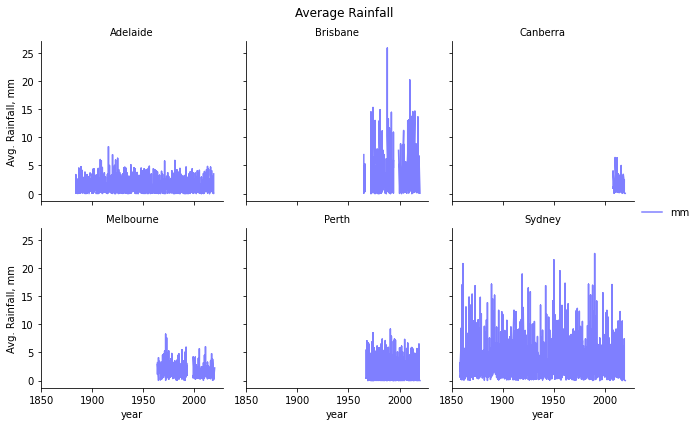

In [194]:
# Create a grid : initialize it
g = sns.FacetGrid(rainfall_group, col='city_name', col_wrap=3, )

# Rainfall
g = g.map(plt.plot, 'year', 'rainfall', alpha = 0.5,color='blue', label='mm')
 

# Control the title of each facet
g = g.set_titles("{col_name}")

g = g.set_ylabels("Avg. Rainfall, mm")
g = g.add_legend()
 
# Add a title for the whole plot
plt.subplots_adjust(top=0.9)
g = g.fig.suptitle('Average Rainfall')
#plt.legend(loc='best')
# Show the graph
plt.show()

In [168]:
# Get the shape file
shape_file = gpd.datasets.get_path("naturalearth_lowres")

# Read shape file
countries = gpd.read_file(shape_file)

# Filter the appropriate country
aus_map = countries[(countries['iso_a3'] == 'AUS')]

/home/elite/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


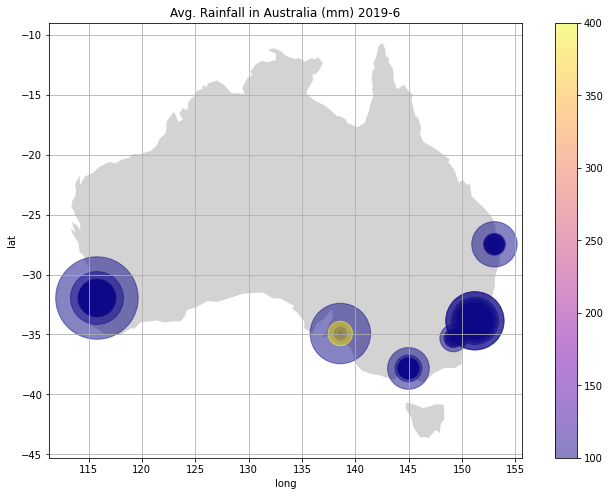

In [183]:
# Plot the fires' location on the map
fig, ax = plt.subplots(figsize=(12,8))
aus_map.plot(color="lightgrey", ax=ax)
year = 2019
month = 6
df = rainfall[(rainfall['year']==year) & (rainfall['month']==month)]
df.plot(x="long", y="lat", kind="scatter", s =df['rainfall']*100,\
               alpha=0.5, ax=ax, c=df['period']*100, cmap='plasma')
ax.grid()
ax.set_title("Avg. Rainfall in Australia (mm) "+ str(year)+ '-' +str(month));

## Temperatures

In [5]:
temperature.head()

,city_name,date,temperature,temp_type,site_name
0,PERTH,1910-01-01,26.7,max,PERTH AIRPORT
1,PERTH,1910-01-02,27.0,max,PERTH AIRPORT
2,PERTH,1910-01-03,27.5,max,PERTH AIRPORT
3,PERTH,1910-01-04,24.0,max,PERTH AIRPORT
4,PERTH,1910-01-05,24.8,max,PERTH AIRPORT


In [6]:
temperature['city_name'].unique()

array(['PERTH', 'PORT', 'KENT', 'BRISBANE', 'SYDNEY', 'CANBERRA',
       'MELBOURNE'], dtype=object)

In [7]:
temperature['site_name'].unique()

array(['PERTH AIRPORT', 'PORT LINCOLN AWS', 'KENT TOWN', 'BRISBANE AERO',
       'SYDNEY (OBSERVATORY HILL)', 'CANBERRA AIRPORT',
       'MELBOURNE (OLYMPIC PARK)'], dtype=object)

In [8]:
temperature['temp_type'].unique()

array(['max', 'min'], dtype=object)

In [9]:
temperature['year'] = pd.to_datetime(temperature['date']).dt.year

In [147]:
temperature_merged = pd.merge(temperature_max, temperature_min, on=['city_name','date', 'site_name'], suffixes=('_max', '_min'))

temperature_merged.drop(['temp_type_max', 'temp_type_min'], axis=1, inplace=True)

temperature_merged['year']= pd.to_datetime(temperature_merged['date']).dt.year

In [151]:
temperature_merged_group = temperature_merged.groupby(by=['city_name','year']).mean()

temperature_merged_group.reset_index(inplace=True)

temperature_merged_group['city_name'].value_counts()

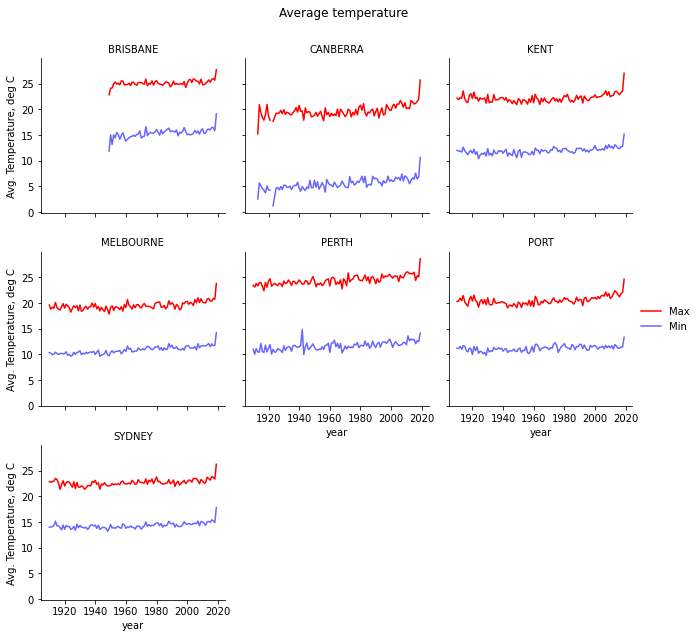

In [155]:
# Create a grid : initialize it
g = sns.FacetGrid(temperature_merged_group, col='city_name', col_wrap=3, )

# Max temp
g = g.map(plt.plot, 'year', 'temperature_max', color='red', label='Max')
 
# Min temp
g = g.map(plt.plot, 'year', 'temperature_min', color='blue', alpha=0.6, label='Min')
 
# Control the title of each facet
g = g.set_titles("{col_name}")

g = g.set_ylabels("Avg. Temperature, deg C")
g = g.add_legend()
 
# Add a title for the whole plot
plt.subplots_adjust(top=0.9)
g = g.fig.suptitle('Average temperature')
#plt.legend(loc='best')
# Show the graph
plt.show()

## Bush fires

In [8]:
nasa_fire.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,confidence,version,bright_t31,frp,daynight
0,-32.052,151.387,328.0,1.6,1.2,2019-12-29,25,T,59,6.0NRT,303.2,38.8,D
1,-32.054,151.402,327.2,1.6,1.2,2019-12-29,25,T,54,6.0NRT,301.4,39.3,D
2,-32.149,151.337,327.1,1.6,1.2,2019-12-29,25,T,32,6.0NRT,303.9,32.9,D
3,-32.153,151.370,331.4,1.6,1.2,2019-12-29,25,T,62,6.0NRT,304.2,39.5,D
4,-32.160,151.334,335.5,1.6,1.2,2019-12-29,25,T,76,6.0NRT,303.6,55.5,D


<AxesSubplot:>

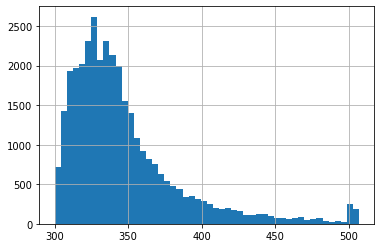

In [83]:
nasa_fire['brightness'].hist(bins=50)

In [87]:
nasa_fire['acq_date'].unique()

array(['2019-12-29', '2019-12-30', '2019-12-31', '2020-01-01',
       '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05'],
      dtype=object)

<AxesSubplot:>

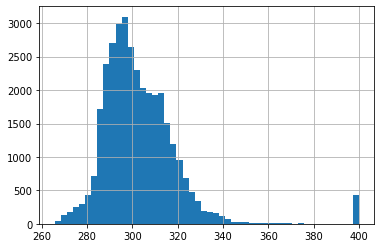

In [89]:
nasa_fire['bright_t31'].hist(bins=50)

<AxesSubplot:>

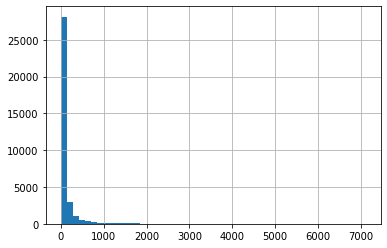

In [91]:
nasa_fire['frp'].hist(bins=50)

In [19]:
# Get the shape file
shape_file = gpd.datasets.get_path("naturalearth_lowres")

# Read shape file
countries = gpd.read_file(shape_file)

# Filter the appropriate country
aus_map = countries[(countries['iso_a3'] == 'AUS') \
                    | (countries['name'] == 'New Zealand') \
                    | (countries['name'] == 'New Caledonia') \
                    | (countries['name'] == 'Papua New Guinea')]

/home/elite/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


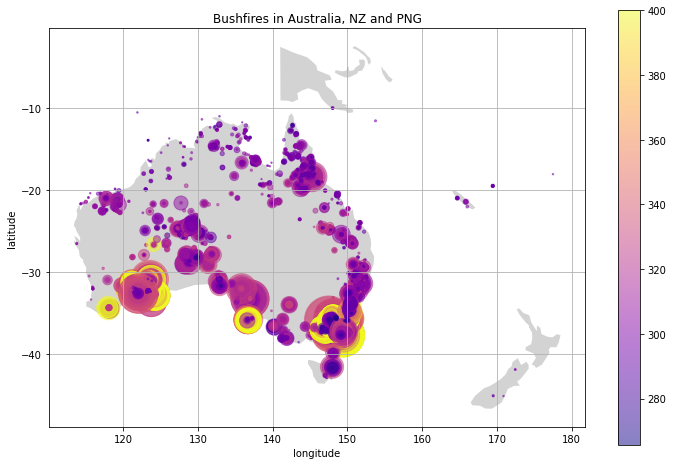

In [82]:
# Plot the fires' location on the map
fig, ax = plt.subplots(figsize=(12,8))
aus_map.plot(color="lightgrey", ax=ax)

nasa_fire.plot(x="longitude", y="latitude", kind="scatter", \
               s=nasa_fire["frp"]/3,c=nasa_fire["bright_t31"],\
               colormap="plasma", alpha=0.5, ax=ax)
ax.grid()
ax.set_title("Bushfires in Australia, NZ and PNG");